# Import necessary libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
phonedata = pd.read_csv('MobilePriceRange.csv')
phonedata.head()

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


Variable Descriptions:

BatteryPower - Total energy a battery can store in one time measured in mAh

InternalMemory - Internal Memory in Gigabytes

ClockSpeed - Speed at which microprocessor executes instructions

NoOfCores - Number of cores of processor

RAM - Random Access Memory in Megabytes

TalkTime - Longest time that a single battery charge will last when you are

DualSim - Has dual sim support or not

3G - Has 3G or not

4G - Has 4G or not

WiFi - Has wifi or not

Bluetooth - Has bluetooth or not

MobileDepth - Mobile Depth in cm

MobileWeight - Weight of mobile phone

TouchScreen - Has touch screen or not

ScreenHeight - Screen Height of mobile in cm

ScreenWidth - Screen Width of mobile in cm

FrontCameraPx - Front Camera mega pixels

RearCameraPX - Rear Camera mega pixels

PxHeight - Pixel Resolution Height

PxWeight - Pixel Resolution Width

PriceRange - Price range from low, medium, high to very high

In [3]:
print("Data type : ", type(phonedata))
print("Data dims : ", phonedata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2000, 21)


In [4]:
print(phonedata.dtypes)

BatteryPower        int64
InternalMemory      int64
ClockSpeed        float64
NoOfCores           int64
RAM                 int64
TalkTime            int64
DualSim             int64
3G                  int64
4G                  int64
WiFi                int64
Bluetooth           int64
MobileDepth       float64
MobileWeight        int64
TouchScreen         int64
ScreenHeight        int64
ScreenWidth         int64
FrontCameraPx       int64
RearCameraPX        int64
PxHeight            int64
PxWeight            int64
PriceRange         object
dtype: object


NOTE:

- The original dataset contains the data of 2000 mobile phones (rows) and 21 variables (columns).

- PriceRange is changed to dtype of int64 instead of object.

- A new variable 'Total Resolution' is created by multiplying 'PxHeight' and 'PxWeight' for ease of comparison for resolution. 'PxHeight' and 'PxWeight' are then removed from the dataset.

- There are 20 variables remaining:

* 14 numerical variables including BatteryPower, InternalMemory, ClockSpeed, NoOfCores, RAM, TalkTime, MobileDepth, MobileWeight, ScreenHeight, ScreenWidth, FrontCameraPx, RearCameraPX and Total Resolution.

* 6 boolean variables including DualSim, 3G, 4G, WiFi, Bluetooth, and TouchScreen. As well as our goal in this mini project: PriceRange as response categorical variable.

## Data Cleaning

In [5]:
# Check unique values in PriceRange before converting it to numerical
print(phonedata['PriceRange'].unique())

['Medium' 'High' 'VeryHigh' 'Low']


In [6]:
# Create a new dataframe to avoid modifying the original
newphonedata = pd.DataFrame(phonedata)

# Convert PriceRange to int64 dtype
PriceRangeInt = {'Low': 0, 'Medium': 1, 'High': 2, 'VeryHigh': 3}
newphonedata['PriceRange'] = newphonedata['PriceRange'].map(PriceRangeInt)
newphonedata['PriceRange'] = newphonedata['PriceRange'].astype('int64')

newphonedata['Total Resolution'] = newphonedata['PxHeight'] * newphonedata['PxWeight']
newphonedata.drop(columns=['PxHeight', 'PxWeight'], inplace=True)
newphonedata

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,Bluetooth,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PriceRange,Total Resolution
0,842,7,2.2,2,2549,19,0,0,0,1,0,0.6,188,0,9,7,1,2,1,15120
1,1021,53,0.5,3,2631,7,1,1,1,0,1,0.7,136,1,17,3,0,6,2,1799140
2,563,41,0.5,5,2603,9,1,1,1,0,1,0.9,145,1,11,2,2,6,2,2167308
3,615,10,2.5,6,2769,11,0,1,0,0,1,0.8,131,0,16,8,0,9,2,2171776
4,1821,44,1.2,2,1411,15,0,1,1,0,1,0.6,141,1,8,2,13,14,1,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,2,0.5,6,668,19,1,1,1,0,1,0.8,106,1,13,4,0,14,0,2309580
1996,1965,39,2.6,4,2032,16,1,1,0,1,1,0.2,187,1,11,10,0,3,2,1797975
1997,1911,36,0.9,8,3057,5,1,1,1,0,0,0.7,108,1,9,1,1,3,3,1416576
1998,1512,46,0.9,5,869,19,0,1,1,1,0,0.1,145,1,18,10,4,5,0,225120


In [7]:
# Detect duplicate data
print(f'number of duplicated data: {len(newphonedata[newphonedata.duplicated()])}')

number of duplicated data: 0


In [8]:
# Detect missing data
newphonedata.isnull().sum()

BatteryPower        0
InternalMemory      0
ClockSpeed          0
NoOfCores           0
RAM                 0
TalkTime            0
DualSim             0
3G                  0
4G                  0
WiFi                0
Bluetooth           0
MobileDepth         0
MobileWeight        0
TouchScreen         0
ScreenHeight        0
ScreenWidth         0
FrontCameraPx       0
RearCameraPX        0
PriceRange          0
Total Resolution    0
dtype: int64

 We do check the dataset for any duplicate data or missing data in this dataset to ensure the quality of the dataset and our analysis will be more accurate.

In [9]:
newphonedata.describe()

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,Bluetooth,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PriceRange,Total Resolution
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,1238.518500,32.046500,1.522250,4.520500,2124.213000,11.011000,0.509500,0.761500,0.521500,0.507000,0.4950,0.501750,140.249000,0.503000,12.306500,5.767000,4.309500,9.916500,1.500000,9.052601e+05
std,439.418206,18.145715,0.816004,2.287837,1084.732044,5.463955,0.500035,0.426273,0.499662,0.500076,0.5001,0.288416,35.399655,0.500116,4.213245,4.356398,4.341444,6.064315,1.118314,8.297625e+05
min,501.000000,2.000000,0.500000,1.000000,256.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.100000,80.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,851.750000,16.000000,0.700000,3.000000,1207.500000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.200000,109.000000,0.000000,9.000000,2.000000,1.000000,5.000000,0.750000,2.632005e+05
50%,1226.000000,32.000000,1.500000,4.000000,2146.500000,11.000000,1.000000,1.000000,1.000000,1.000000,0.0000,0.500000,141.000000,1.000000,12.000000,5.000000,3.000000,10.000000,1.500000,6.013590e+05
75%,1615.250000,48.000000,2.200000,7.000000,3064.500000,16.000000,1.000000,1.000000,1.000000,1.000000,1.0000,0.800000,170.000000,1.000000,16.000000,9.000000,7.000000,15.000000,2.250000,1.359027e+06
max,1998.000000,64.000000,3.000000,8.000000,3998.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,200.000000,1.000000,19.000000,18.000000,19.000000,20.000000,3.000000,3.886306e+06


In [10]:
newphonedata.to_csv('newphonedata.csv')

## Exploratory Data Analysis

### Non-numerical univariate plots

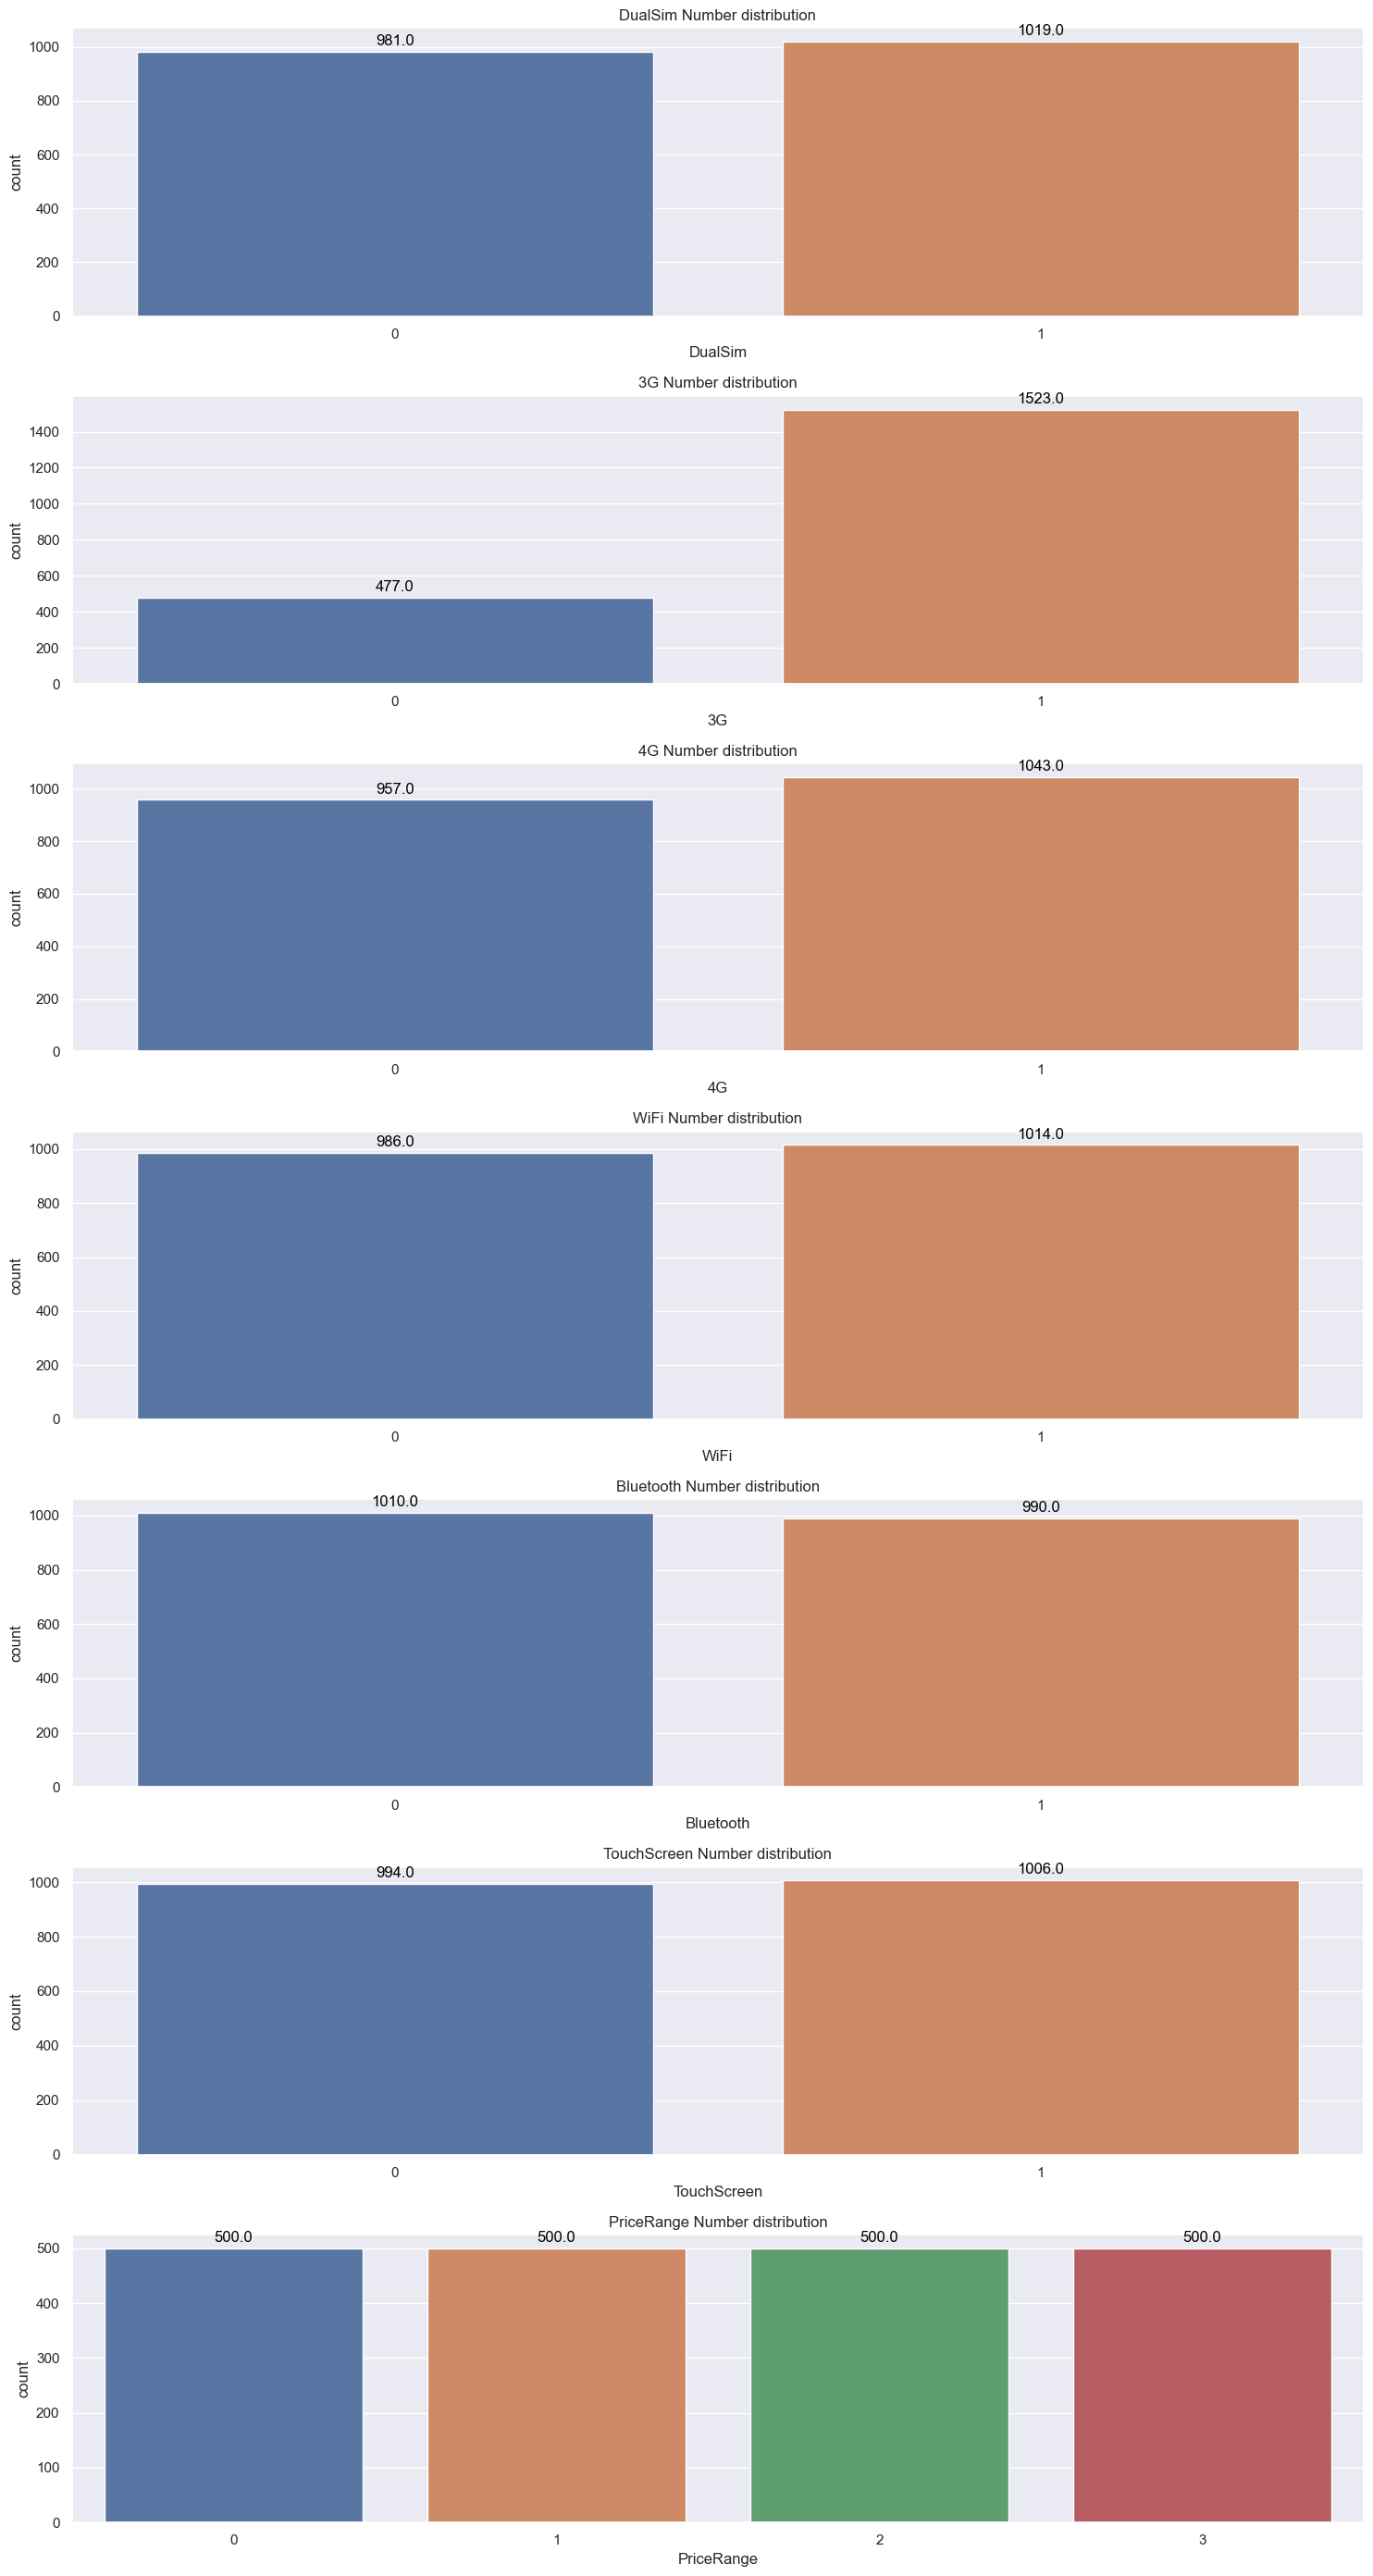

In [11]:
# Define the categorical variables
categorical_variables = ['DualSim','3G', '4G', 'WiFi', 'Bluetooth', 'TouchScreen', 'PriceRange']

# Create subplots
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(15, 4 * len(categorical_variables)))

# Loop over each row (variable) and plot a countplot
for i, column in enumerate(categorical_variables):
    # Calculate the number of occurrences for each category
    category_counts = newphonedata[column].value_counts()

    # Plot countplot
    ax_countplot = sb.countplot(data=newphonedata, x=column, ax=axes[i])
    ax_countplot.set_title(f"{column} Number distribution")

    # Add labels to countplot
    for p in ax_countplot.patches:
        ax_countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                              textcoords='offset points')

plt.tight_layout()
plt.show()


Based on above countplot, we notice that the distribution of the response variable \(PriceRange\) is balanced with a ratio of 1:1:1:1 for all 4 classes. The distribution of other categorical predictor variables is almost balance except for the variable 3G \(have : don't have\) with ratio 3:1 approximately.

### Numerical univariate plots

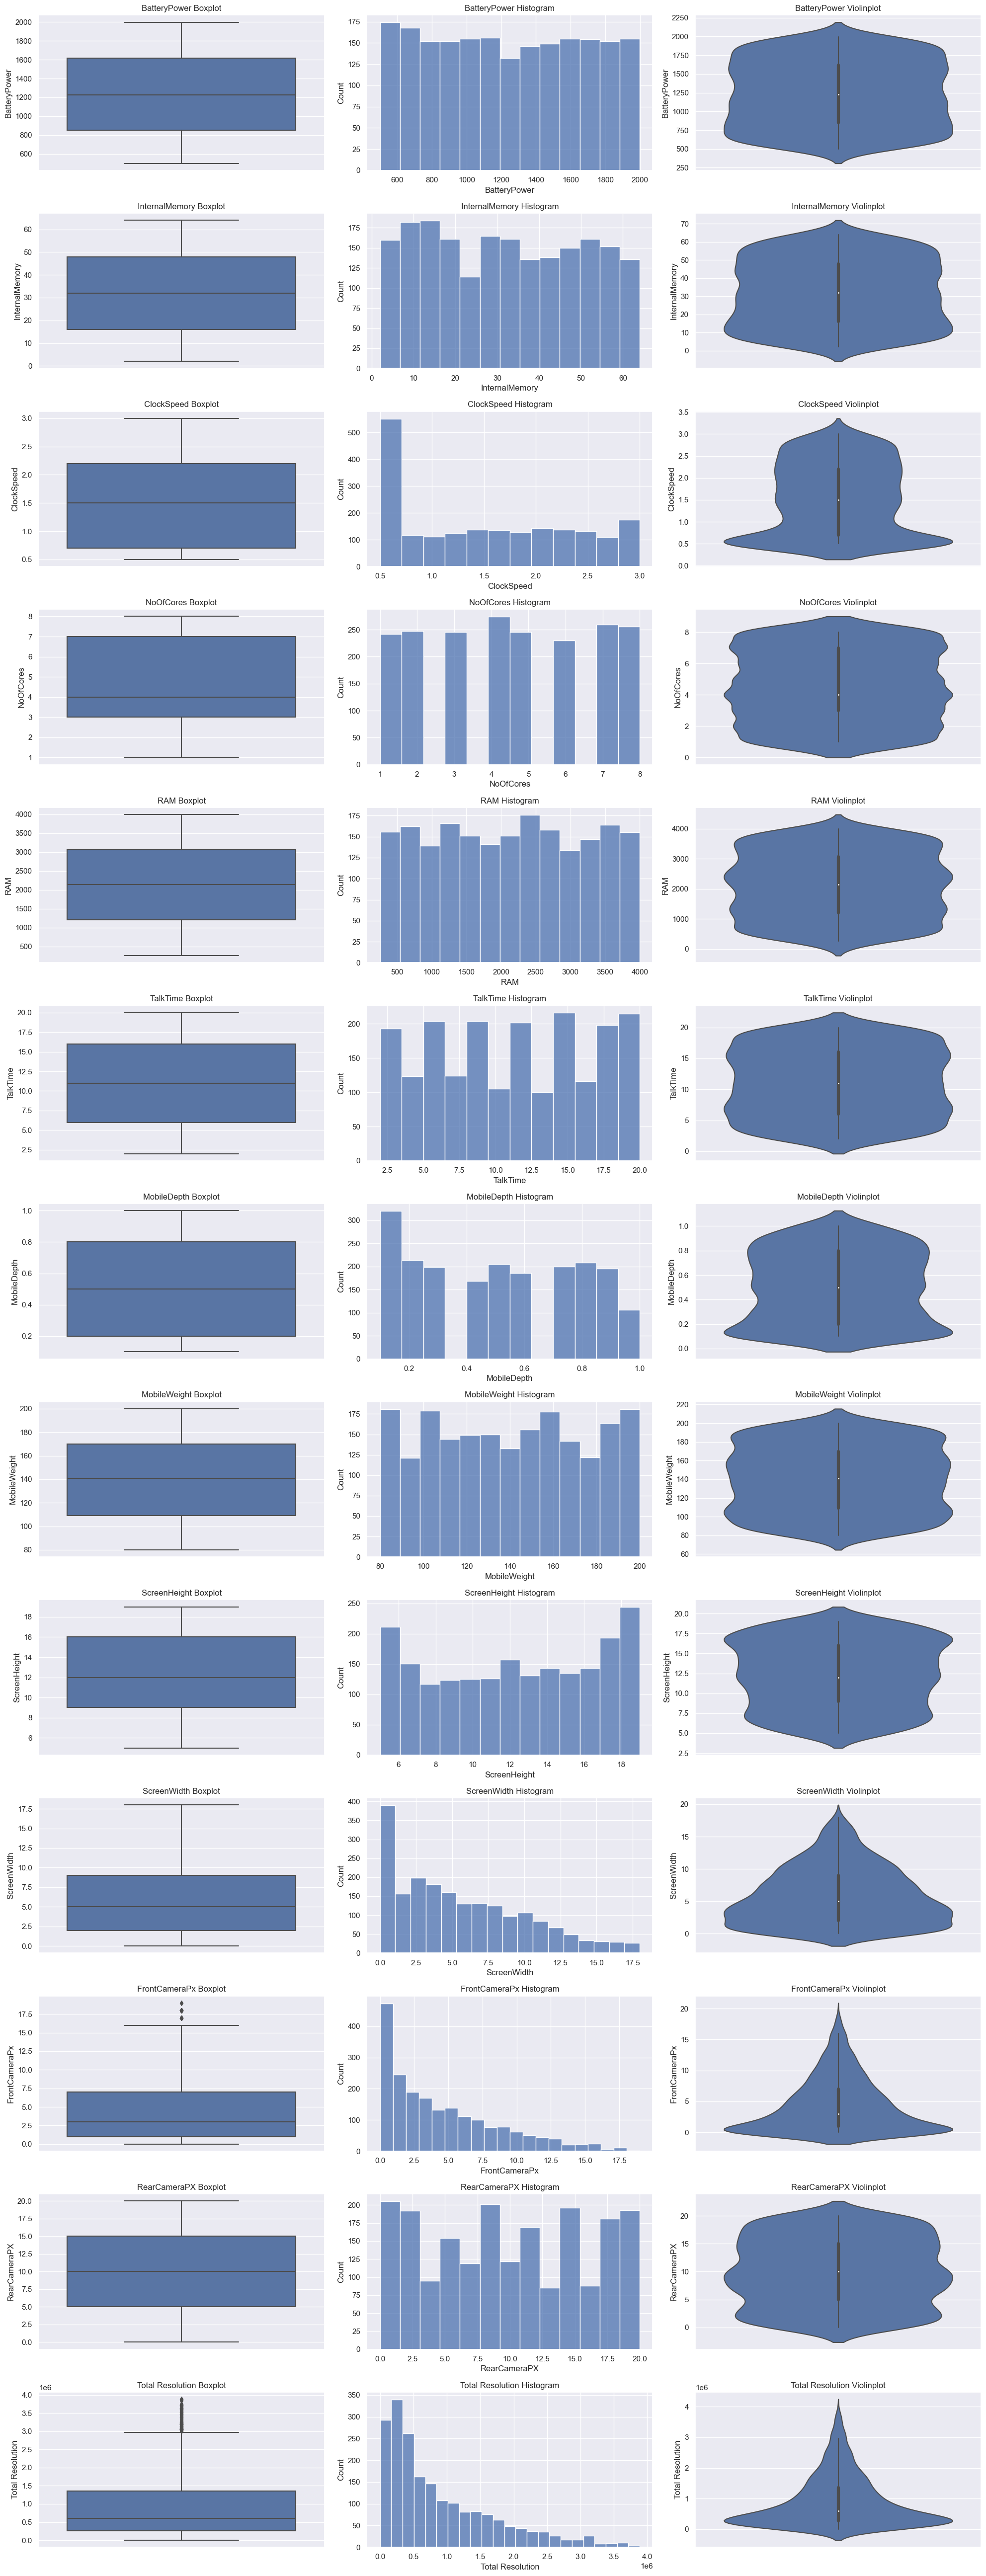

In [12]:
# Define numerical variables
numerical_variables = ['BatteryPower', 'InternalMemory', 'ClockSpeed', 'NoOfCores', 'RAM', 'TalkTime', 'MobileDepth', 
                       'MobileWeight', 'ScreenHeight', 'ScreenWidth', 'FrontCameraPx', 'RearCameraPX', 'Total Resolution']

# Create subplots
fig, axes = plt.subplots(len(numerical_variables), 3, figsize=(20, 4 * len(numerical_variables)))

# Loop over each numerical variable and plot boxplot, histogram, and violinplot
for i, column in enumerate(numerical_variables):
    # Plot boxplot
    ax_boxplot = sb.boxplot(data=newphonedata, y=column, ax=axes[i, 0])
    ax_boxplot.set_title(f"{column} Boxplot")

    # Plot histogram
    ax_histogram = sb.histplot(data=newphonedata, x=column, ax=axes[i, 1])
    ax_histogram.set_title(f"{column} Histogram")

    # Plot violinplot
    ax_violinplot = sb.violinplot(data=newphonedata, y=column, ax=axes[i, 2])
    ax_violinplot.set_title(f"{column} Violinplot")

plt.tight_layout()
plt.show()


We noticed that there are many outliers for the variable Total Resolution. Leave it first because they may represent legitimate variations in screen resolution among different mobile phones.

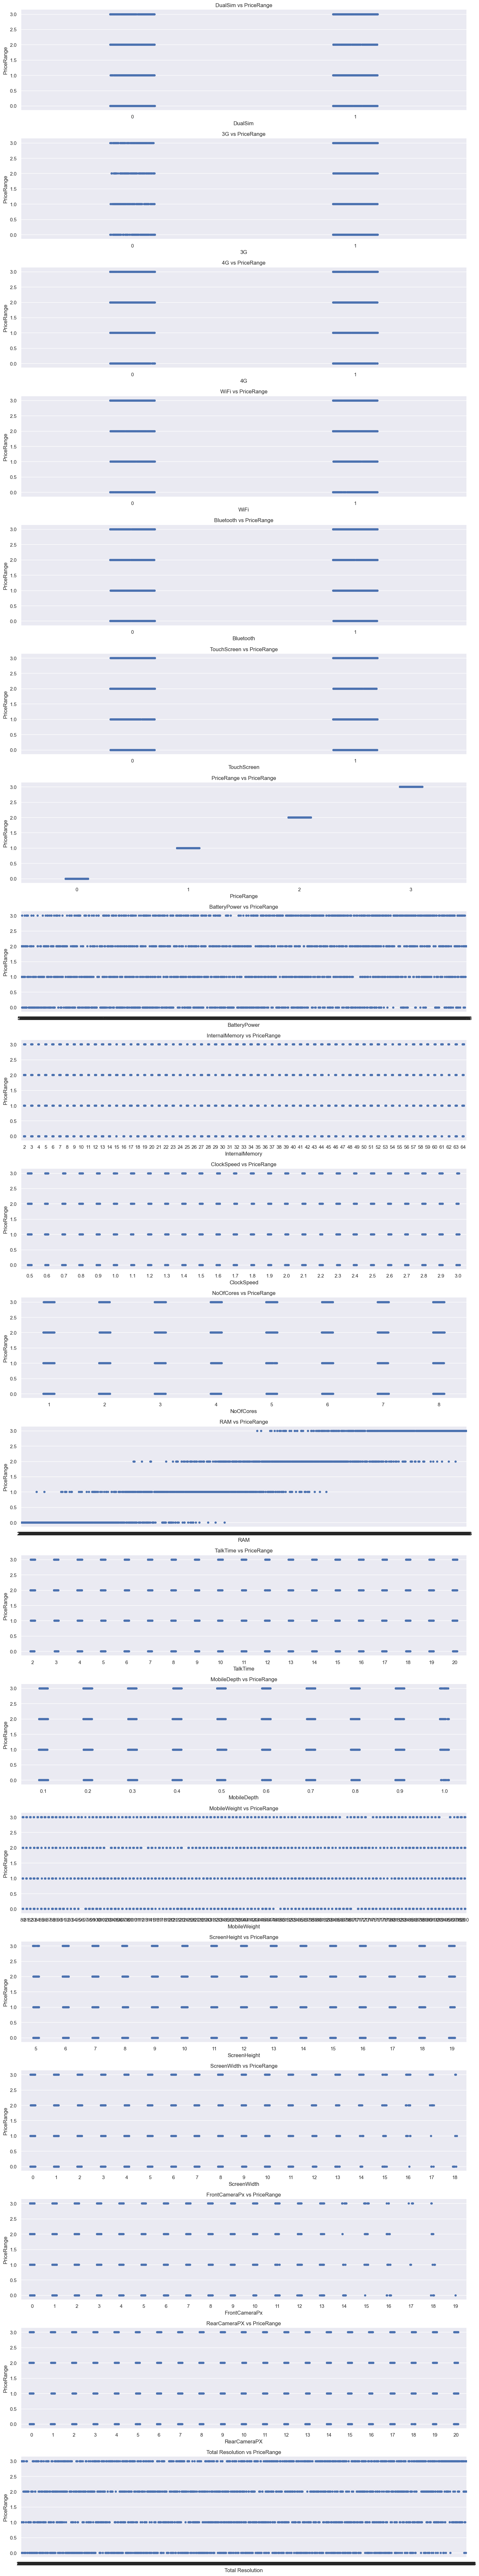

In [13]:
# Create subplots
fig, axes = plt.subplots(len(categorical_variables) + len(numerical_variables), 1, figsize=(15, 4 * (len(categorical_variables) + len(numerical_variables))))

# Loop over each categorical variable and plot a stripplot
for i, column in enumerate(categorical_variables):
    ax_stripplot = sb.stripplot(data=newphonedata, x=column, y='PriceRange', jitter=True, ax=axes[i])
    ax_stripplot.set_title(f"{column} vs PriceRange")

# Loop over each numerical variable and plot a stripplot
for i, column in enumerate(numerical_variables):
    ax_stripplot = sb.stripplot(data=newphonedata, x=column, y='PriceRange', jitter=True, ax=axes[i + len(categorical_variables)])
    ax_stripplot.set_title(f"{column} vs PriceRange")

plt.tight_layout()
plt.show()


We observed that the datapoints for the variable RAM are clustered. When the RAM of a mobile phone is low, the data points concentrate at the low PriceRange, while for high RAM values, the data points are concentrated at the high PriceRange. This suggests that RAM may be a significant factor in determining the PriceRange of a mobile phone.

## Heatmap of Correlation plot

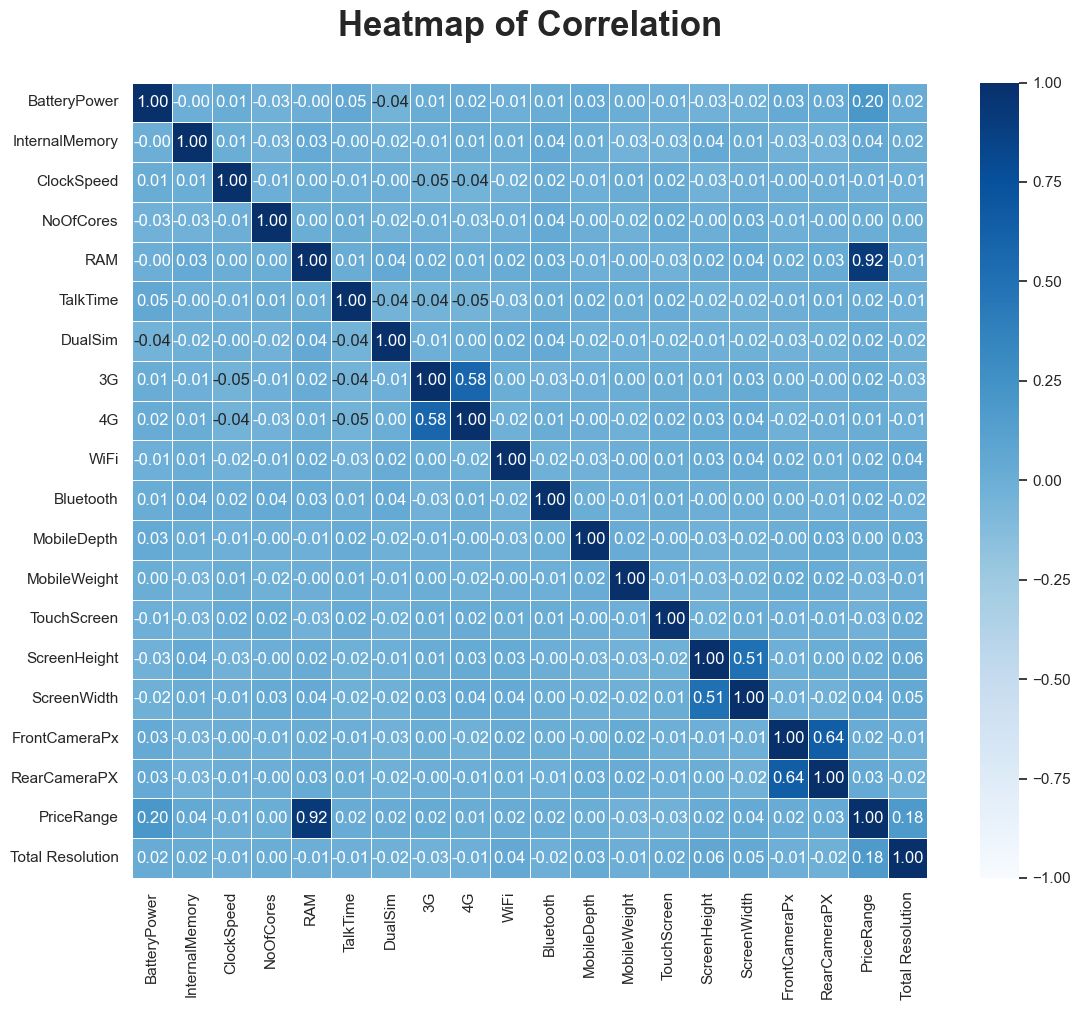

In [14]:
# Calculate correlation matrix
corr_matrix = newphonedata.select_dtypes(['float64', 'int64']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sb.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1, linewidths=.5, square=True)

plt.title('Heatmap of Correlation\n', fontsize=25, fontweight='bold')

plt.tight_layout()
plt.show()

The heatmap of correlation shows that the RAM has the strongest linear relationship with PriceRange followed by Battery Power and Total Resolution. For the remaining predictors, their correlation matrix to PriceRange are aproximate to 0, indicating that they have weak linear relationships with the PriceRange.

This suggests that RAM, Battery Power, and Total Resolution are more important predictors for determining the price range of a mobile phone compared to other specifications.